In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from toolkit.transformation import rotate_image

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")

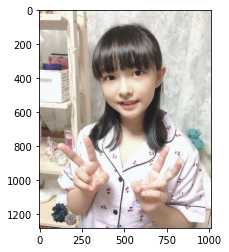

In [3]:
img = cv2.imread('../sample.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

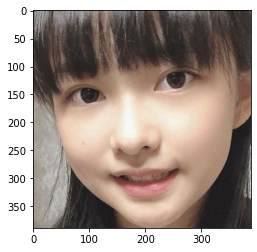

In [4]:
(x, y, w, h) = face_cascade.detectMultiScale(img, 1.1, 4)[0]
face_img = img[y:y+h,x:x+w, :]

plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.show()

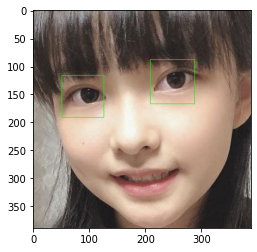

In [5]:
eyes = eye_cascade.detectMultiScale(face_img, 1.1, 4)
for (x, y, w, h) in eyes:
    cv2.rectangle(face_img, (x, y), (x+w, y+h), (0, 255, 0), 1)
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
left_eye = eyes[0]
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0] 
left_eye_y = left_eye_center[1]

right_eye = eyes[1]
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]

In [7]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y
angle=np.arctan(delta_y/delta_x)
angle = (angle * 180) / np.pi

In [8]:
angle

-9.22988624372772

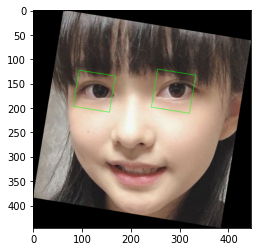

In [9]:
plt.imshow(rotate_image(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB), angle))
plt.show()